In [3]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.drop(['id','date'],axis=1,inplace=True)


In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
# changing float to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
df.rename(columns={'yr_built':'age'},inplace=True)
df['age'] = 2023 - df['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
df.rename(columns={'yr_renovated':'renovated'},inplace=True)
df['renovated'] = df['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [16]:
# using simple feature scaling
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_living15'] = df['sqft_living15']/df['sqft_living15'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()
df['sqft_above'] = df['sqft_above']/df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement']/df['sqft_basement'].max()
df['sqft_lot15'] = df['sqft_lot15']/df['sqft_lot15'].max()

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,68,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,72,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,90,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,58,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,36,0,98074,47.6168,-122.045,0.289855,0.008612


In [ ]:
# Visulaizing the data

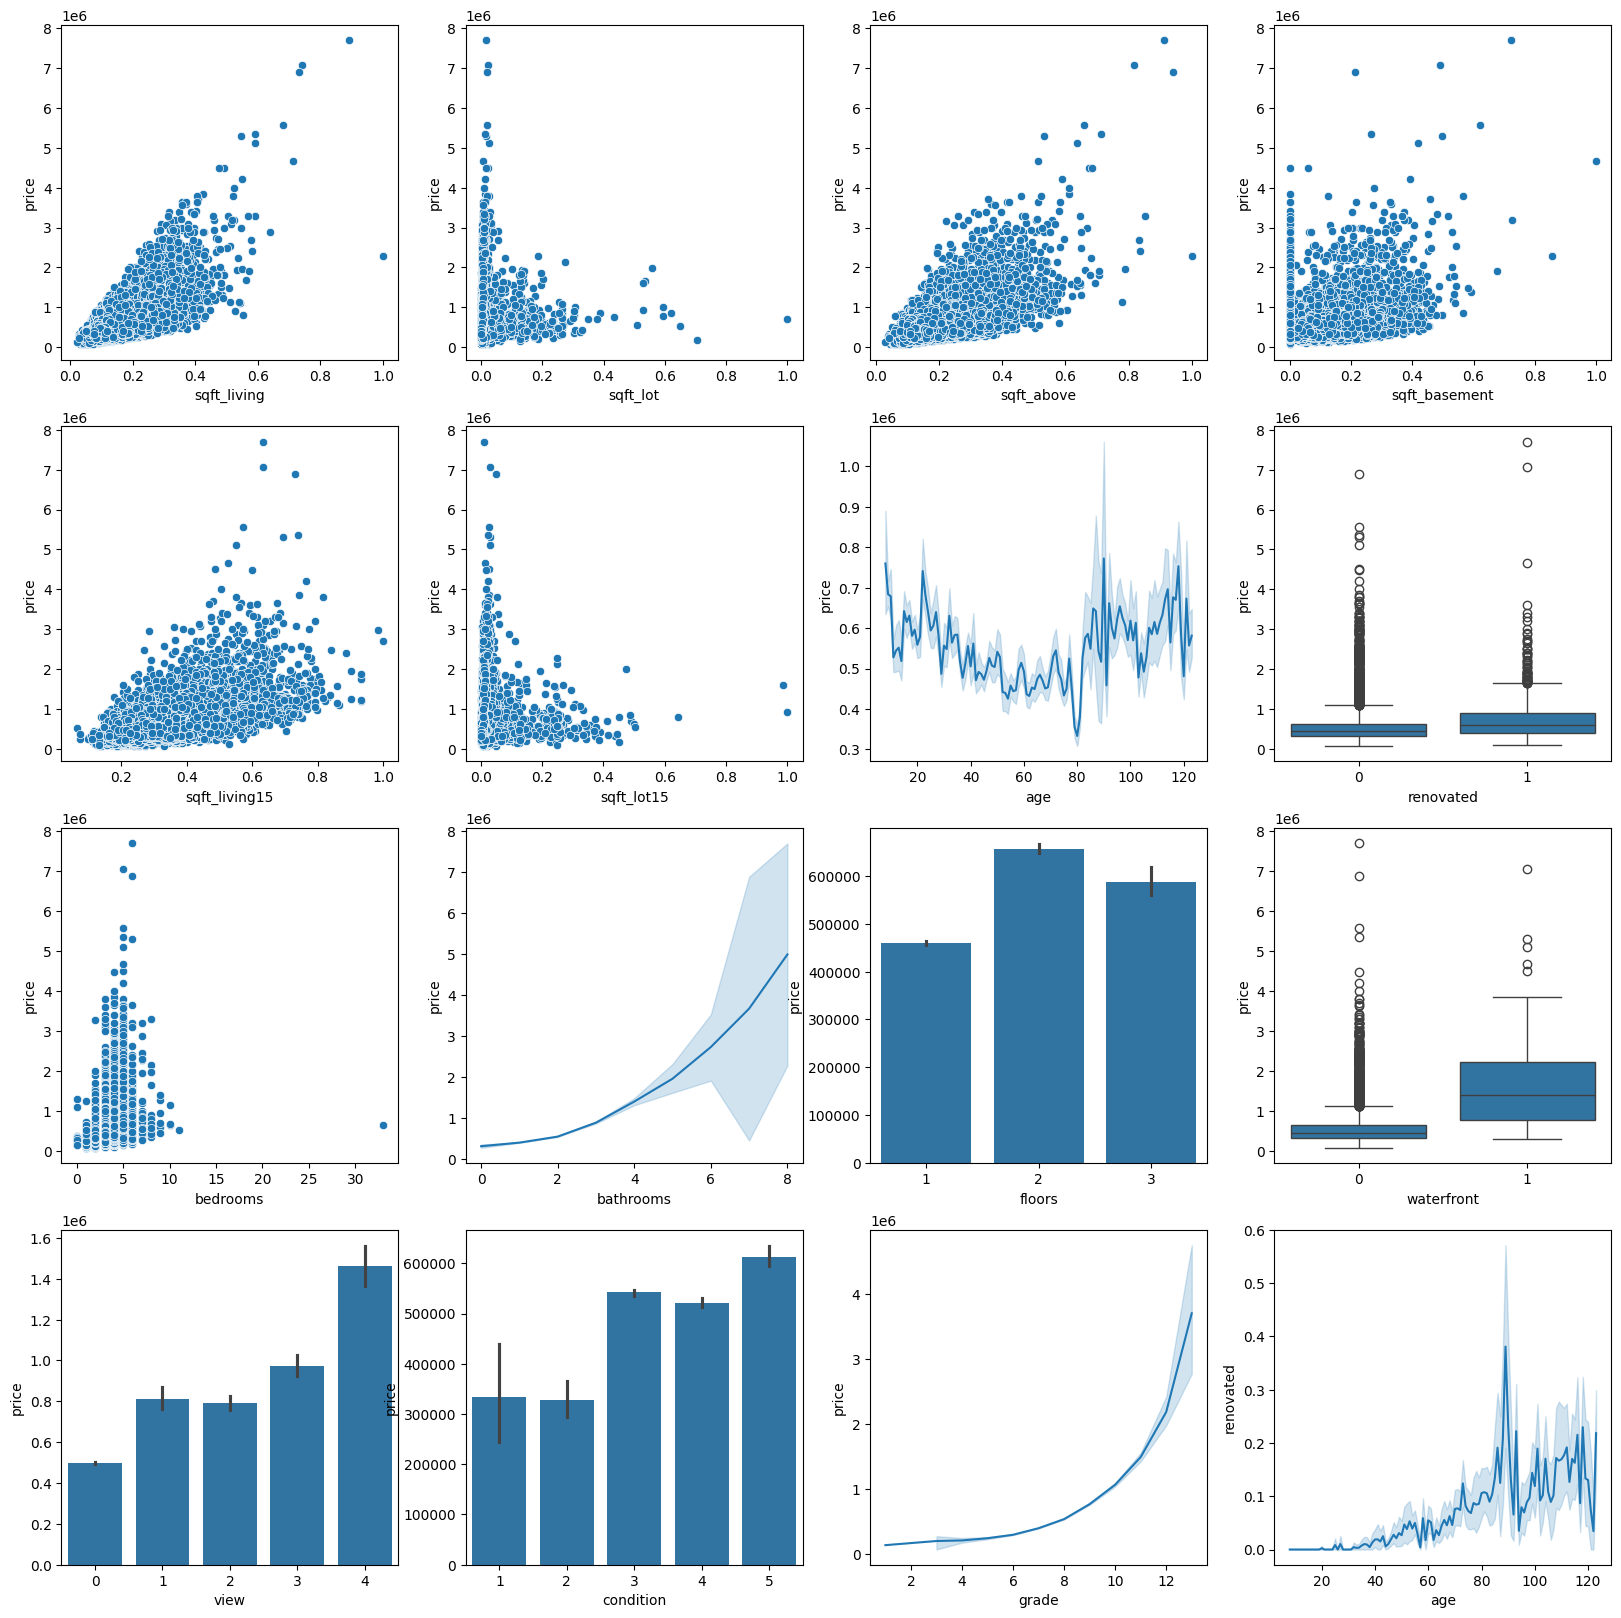

In [23]:
# visualizing the relation between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = df['sqft_living'], y = df['price'],ax=ax[0,0])
sns.scatterplot( x = df['sqft_lot'], y = df['price'],ax=ax[0,1])
sns.scatterplot( x = df['sqft_above'], y = df['price'],ax=ax[0,2])
sns.scatterplot( x = df['sqft_basement'], y = df['price'],ax=ax[0,3])
sns.scatterplot( x = df['sqft_living15'], y = df['price'],ax=ax[1,0])
sns.scatterplot( x = df['sqft_lot15'], y = df['price'],ax=ax[1,1])
sns.lineplot( x = df['age'], y = df['price'],ax=ax[1,2])
sns.boxplot( x = df['renovated'], y = df['price'],ax=ax[1,3])
sns.scatterplot( x = df['bedrooms'], y = df['price'],ax=ax[2,0])
sns.lineplot( x = df['bathrooms'], y = df['price'],ax=ax[2,1])
sns.barplot( x = df['floors'], y = df['price'],ax=ax[2,2])
sns.boxplot( x = df['waterfront'], y = df['price'],ax=ax[2,3])
sns.barplot( x = df['view'], y = df['price'],ax=ax[3,0])
sns.barplot( x = df['condition'], y = df['price'],ax=ax[3,1])
sns.lineplot( x = df['grade'], y = df['price'],ax=ax[3,2])
sns.lineplot( x = df['age'], y = df['renovated'],ax=ax[3,3])
plt.show()

In [ ]:
# Plotting the location of the houses based on longitude and latitude on the map

In [29]:
# adding a new column price_range and categorizing the price into 4 categories
df['price_range'] = pd.cut(df['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])

In [30]:
import folium
from folium.plugins import FastMarkerCluster
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(df[['lat', 'long']].values.tolist()).add_to(map)
map

In [ ]:
# Train/Test Split

In [31]:
from sklearn.model_selection import train_test_split
df.drop(['price_range'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1),df['price'],test_size=0.3,random_state=10)

In [ ]:
# Model Training
# Using pipeline to combine the transformers and estimators and fit the model

In [42]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [33]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [34]:
#training the model
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8271845090247655

In [35]:
#testing the model
pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)

0.8271845090247655

In [36]:
# Ridge Regression
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel

Ridge(alpha=0.001)

In [37]:
# training the model
Ridgemodel.fit(X_train,y_train)
Ridgemodel.score(X_test,y_test)

0.7123220593275172

In [38]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.7123220593275172

In [39]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [ ]:
# training the model
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

In [43]:
#testing the model
yhat = regressor.predict(X_test)
r2_score(y_test,yhat)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

C:\Users\aftab a\AppData\Local\Temp\ipykernel_14988\3154675466.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
C:\Users\aftab a\AppData\Local\Temp\ipykernel_14988\3154675466.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pipe_pred,ax=ax[0])
C:\Users\aftab a\AppData\Loca

NameError: name 'yhat' is not defined

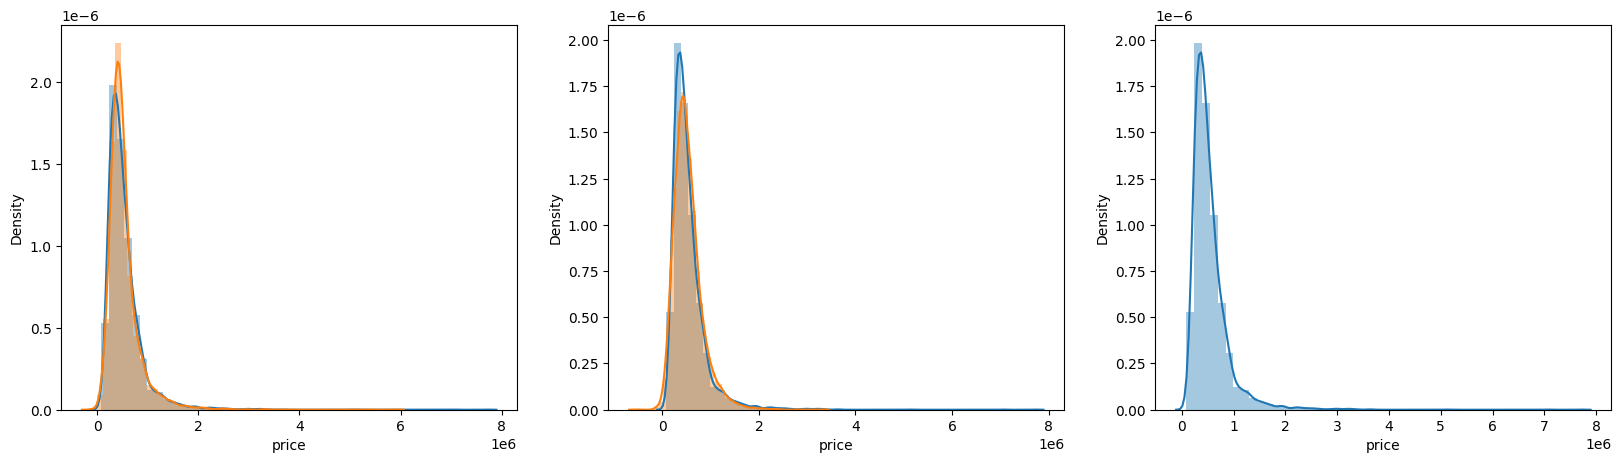

In [44]:
#Model Evalution
# Distribution plot from the models predictions and the actual values
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(yhat,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

NameError: name 'yhat' is not defined

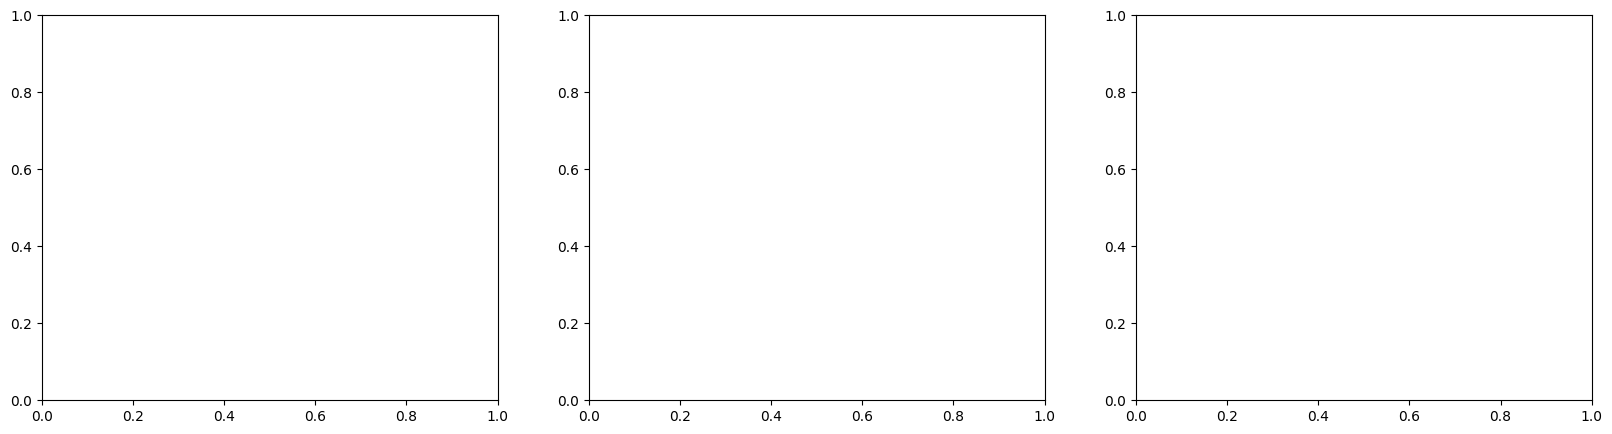

In [45]:
# Error Evaluation
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,pipe_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,yhat)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,pipe_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,yhat)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,pipe_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,yhat))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()

NameError: name 'yhat' is not defined

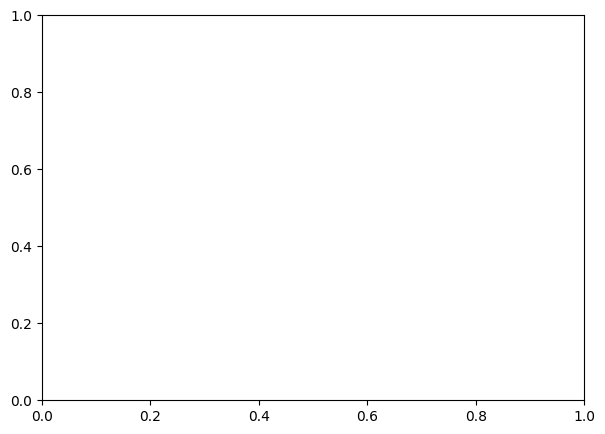

In [46]:
# Accuracy Evaluation
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

In [47]:
# Predicting the price of a new house
#input the values
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000

In [48]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Conclusion
From the analysis, we can see that the Random Forest Regression model performed better than the Ridge Regression model and Polynomial Regression model.

During the EDA process, we found out that the location of the house is a very important factor in determining the price of the house, since houese with similar area and other features can have different prices depending on the location of the house.

The location of the houses has been plotted on the map using the longitude and latitude values which makesrole of location in determining the price of the house more clear.